In [159]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
file_path = r"D:\Git Repositories\AuctionScout-AI-powered-player-recommendations-for-IPL-auctions\dataset\bowlers_df.csv"
df = pd.read_csv(file_path)

In [18]:
filtered_df = df.head(20)

In [19]:
filtered_df

,Player_Name,Deliveries_bowled,runs_conceded,wickets_taken,overs,bowling_average,bowling_strike_rate,economy,Recommendation
0,A Zampa,1248,1566,63,208,24.86,19.81,7.53,BUY
1,AC Agar,961,1118,36,160,31.06,26.69,6.99,MAYBE
2,AD Russell,184,283,7,30,40.43,26.29,9.43,MAYBE
3,ADS Fletcher,6,9,0,1,48.44,39.12,9.00,DON'T BUY
4,AF Milne,342,435,8,57,54.38,42.75,7.63,DON'T BUY
5,AJ Finch,6,10,0,1,48.44,39.12,10.00,DON'T BUY
6,AJ Hosein,351,400,19,58,21.05,18.47,6.90,BUY
7,AJ Nair,24,27,1,4,27.00,24.00,6.75,MAYBE
8,AJ Turner,175,230,5,29,46.00,35.00,7.93,DON'T BUY
9,AJ Tye,1411,1919,89,235,21.56,15.85,8.17,BUY


In [44]:
x = filtered_df.drop(columns=[filtered_df.columns[0], filtered_df.columns[-1]])

In [46]:
y = filtered_df[[filtered_df.columns[-1]]]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=42)

In [48]:
correlation_matrix = X_train.corr()

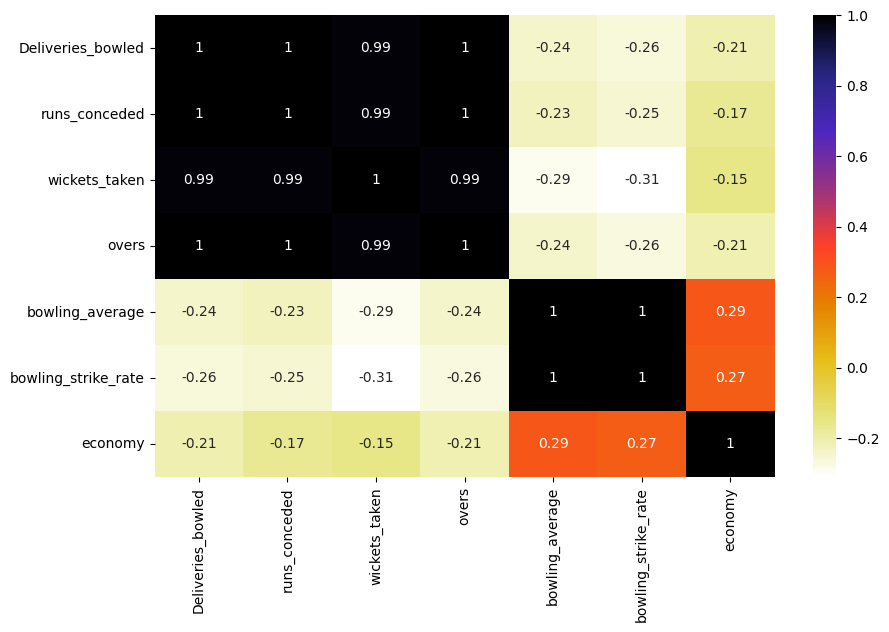

In [63]:
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [76]:
def correlation(dataset, threshold):
    corr_matrix = dataset.corr()
    col_corr =set()
    for i in range(len(corr_matrix)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                col_name = corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

In [88]:
corr_features = correlation(X_train, 0.8)
corr_features

{'bowling_strike_rate', 'overs', 'runs_conceded', 'wickets_taken'}

In [89]:
column_to_keep = 'bowling_strike_rate'

In [101]:
X_train_cleaned = X_train.drop(columns=corr_features - {column_to_keep} , axis=1)

In [102]:
X_test_cleaned = X_test.drop(columns=corr_features - {column_to_keep}, axis=1)

In [97]:
def outliers(dataset):
    
    outlier = []
    threshold = 3
    mean = np.mean(dataset)
    sd = np.std(dataset)
    
    for i in range(len(dataset)):
        value = dataset.iloc[i]
        z_score = (value - mean)/sd
        if np.abs(z_score) > threshold:
            outlier.append(i)
            
    return outlier    

In [109]:
# checking if there is any outlier 
col_to_be_checked = X_train_cleaned['bowling_strike_rate']
outlier_check = outliers(col_to_be_checked)
print(outlier_check)

[6]


In [107]:
X_train_cleaned.head(10)

,Deliveries_bowled,bowling_average,bowling_strike_rate,economy
8,175,46.00,35.00,7.93
5,6,48.44,39.12,10.00
11,64,30.33,21.33,9.10
3,6,48.44,39.12,9.00
18,1331,20.90,15.30,8.23
16,276,41.44,30.67,8.11
13,178,260.00,178.00,8.97
2,184,40.43,26.29,9.43
9,1411,21.56,15.85,8.17
19,487,31.00,25.63,7.27


In [120]:
def robust_scaler(dataset):
    scaler = RobustScaler()
    scaled_values = scaler.fit_transform(dataset)
    dataset[dataset.columns[0]] = scaled_values
    return dataset
    

In [125]:
def standard_scaler(dataset):
    scaler = StandardScaler()
    scaled_values = scaler.fit_transform(dataset)
    dataset[dataset.columns[0]] = scaled_values
    return dataset

In [126]:
def min_max_scaler(dataset):
    scaler = MinMaxScaler()
    scaled_values = scaler.fit_transform(dataset)
    dataset[dataset.columns[0]] = scaled_values
    return dataset

In [121]:
column_to_be_scaled = X_train_cleaned[["Deliveries_bowled"]]
scaled_df = robust_scaler(column_to_be_scaled)

C:\Users\edwin victor\AppData\Local\Temp\ipykernel_12620\3429774322.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[dataset.columns[0]] = scaled_values


In [127]:
column_to_be_scaled = X_train_cleaned[["bowling_average"]]
scaled_df_2 = robust_scaler(column_to_be_scaled)

C:\Users\edwin victor\AppData\Local\Temp\ipykernel_12620\3429774322.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[dataset.columns[0]] = scaled_values


In [128]:
column_to_be_scaled = X_train_cleaned[["economy"]]
scaled_df_3 = min_max_scaler(column_to_be_scaled)

C:\Users\edwin victor\AppData\Local\Temp\ipykernel_12620\132903432.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[dataset.columns[0]] = scaled_values


In [130]:
column_to_be_scaled = X_train_cleaned[["bowling_strike_rate"]]
scaled_df_4 = robust_scaler(column_to_be_scaled)

C:\Users\edwin victor\AppData\Local\Temp\ipykernel_12620\3429774322.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[dataset.columns[0]] = scaled_values


In [133]:
X_train_scaled = pd.concat([scaled_df, scaled_df_2, scaled_df_4, scaled_df_3], axis=1)
X_train_scaled.head(1)

,Deliveries_bowled,bowling_average,bowling_strike_rate,economy
8,-0.393828,0.806045,0.687827,0.363077


In [134]:
column_to_be_scaled = X_test_cleaned[["Deliveries_bowled"]]
scaled_df_5 = robust_scaler(column_to_be_scaled)

C:\Users\edwin victor\AppData\Local\Temp\ipykernel_12620\3429774322.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[dataset.columns[0]] = scaled_values


In [135]:
column_to_be_scaled = X_test_cleaned[["bowling_average"]]
scaled_df_6 = robust_scaler(column_to_be_scaled)

C:\Users\edwin victor\AppData\Local\Temp\ipykernel_12620\3429774322.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[dataset.columns[0]] = scaled_values


In [136]:
column_to_be_scaled = X_test_cleaned[["bowling_strike_rate"]]
scaled_df_7 = robust_scaler(column_to_be_scaled)

C:\Users\edwin victor\AppData\Local\Temp\ipykernel_12620\3429774322.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[dataset.columns[0]] = scaled_values


In [139]:
column_to_be_scaled = X_test_cleaned[["economy"]]
scaled_df_8 = min_max_scaler(column_to_be_scaled)

C:\Users\edwin victor\AppData\Local\Temp\ipykernel_12620\132903432.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[dataset.columns[0]] = scaled_values


In [140]:
X_test_scaled = pd.concat([scaled_df_5, scaled_df_6, scaled_df_7, scaled_df_8], axis=1)
X_test_scaled

,Deliveries_bowled,bowling_average,bowling_strike_rate,economy
0,0.772527,-0.752400,-0.932486,0.469565
17,-0.410838,0.612936,0.433031,1.000000
15,-0.762445,0.439111,0.469328,0.182609
1,0.410838,-0.439111,-0.433031,0.000000


In [154]:
def label_encoder(dataset):
    encoder = LabelEncoder()
    encoded_column = encoder.fit_transform(dataset)
    dataset = pd.DataFrame(encoded_column, columns=[dataset.columns[0]], index=dataset.index)
    return dataset
    

In [158]:
target_col = y_train[["Recommendation"]]
y_train_encoded = label_encoder(target_col)

D:\miniconda\miniconda\envs\bbl\lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [157]:
target_col = y_test[["Recommendation"]]
y_test_encoded = label_encoder(target_col)

D:\miniconda\miniconda\envs\bbl\lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [175]:
def model_training(X_train, y_train, X_test):
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred


In [170]:
X_train_scaled.columns

Index(['Deliveries_bowled', 'bowling_average', 'bowling_strike_rate',
       'economy'],
      dtype='object')

In [172]:
y_pred = model_training(X_train_scaled, y_train_encoded, X_test_scaled)

D:\miniconda\miniconda\envs\bbl\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [173]:
y_pred

array([0, 1, 1, 0])

In [174]:
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7500
